# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [ ]:
import pandas as pd
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# Executive version

Conclutions:

IT-department has the highest rate of employee turnover, 31 %, and Finance the lowest 27%. But the differance is quite small. No department seems to stick out.

The best predictors for employees to quit is working hours, satisfaction and review. 

Data show that emplyees who left the company has a high review, and that the review level goes down for employees who has worked five, six, seven or eight years. This means the ones that the company gives the highes grades seams to go first. 

We also see a correlations between review and satisfaction, employees with high grades are more satisified, but satisfied employees with high reviews also quit to a higher degree. We also see that employees with a high satisfaction work more hours, and that those with low satisfaction work less.

To reduce turnover rate, and keep employees with high review I suggest the company to start a program. When an employee has worked for three years and have a review of 7.5 or higher they should be called to an interview to find out if they are satisfied with their salary, management and job assignments. Chaging any of these factors might reduce employment turnover, and keep the good employees.
Try to prevent emplyees with high reviews, and a high level of satisfaction, who have worked three years or more from quiting, they leave erlier and to a higher degree than employes who have a lower review and are less satisfied.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
# Get dummy variables for column left
df_dc = pd.get_dummies(df, columns=['left'])

In [ ]:
# Name columns
df_dc.columns = ['department', 'promoted', 'review', 'projects', 'salary', 'tenure', 'satisfaction', 'bonus', 'avg_hrs_month', 'still_working', 'quit']

In [ ]:
# Group number of epmloyees by department
enployees_by_departments = df_dc.groupby('department')[['still_working', 'quit']].sum().astype(int)

In [ ]:
# Count percentage of quitters
temp = []
for i in range(len(enployees_by_departments)):
  temp.append(round(enployees_by_departments.quit[i] / (enployees_by_departments.quit[i] + enployees_by_departments.still_working[i])*100, 2))


In [ ]:
# Turn it into new collumn
enployees_by_departments['turnover_rate'] = temp 

In [ ]:
# Sort values by turnover_rate
enployees_by_departments=enployees_by_departments.sort_values(by='turnover_rate', ascending=False).reset_index()

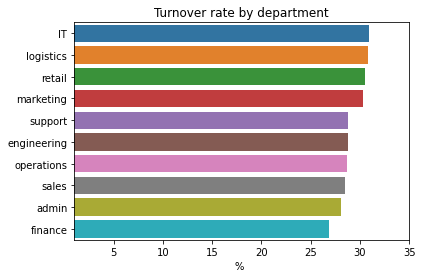

In [ ]:
# Plot Turnover rate by department
p = sns.barplot(x='turnover_rate', y='department', data=enployees_by_departments)
p.set_xlim(1, 35)
p.set(xlabel ="% ", ylabel = "", title ='Turnover rate by department') 
plt.show()

Conclution, IT has the highest turn over rate 31%, and Finance the lowest ca 27%. The difference is very small.

Let's see which other features that are related to employees leavning the compnay, by performing regression.

In [ ]:
# create dataframe for regression analysis
reg = pd.get_dummies(df)

In [ ]:
X = reg[reg.columns[0:len(reg.columns)-2]]
y = reg['left_yes']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

Text(0.5, 0, 'Feature Importance')

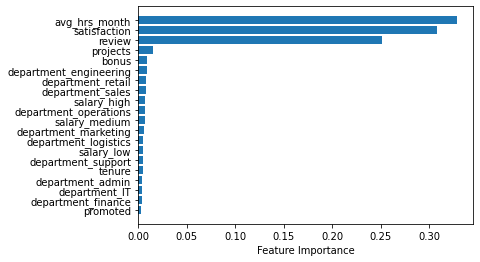

In [ ]:
sort = rf.feature_importances_.argsort()
plt.barh(reg.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")


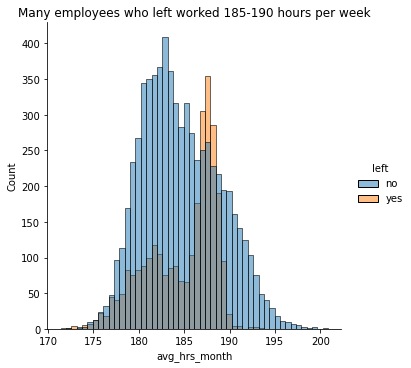

In [ ]:
sns.displot(df, x="avg_hrs_month", hue="left")
plt.title('Many employees who left worked 185-190 hours per week')
plt.show()
plt.show()

Conclution: The features that affect employees desicion to leave are working hours, satisfaction and review. Let's visualize those features: 

In [ ]:
p=dict(yes="r", no="g")

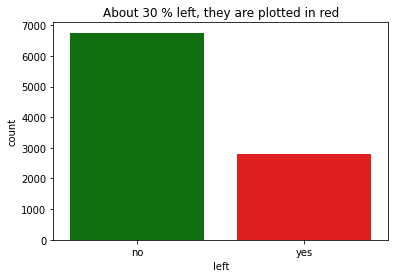

In [ ]:

sns.countplot(x='left', data=df, palette=p)
plt.title('About 30 % left, they are plotted in red')
plt.show()

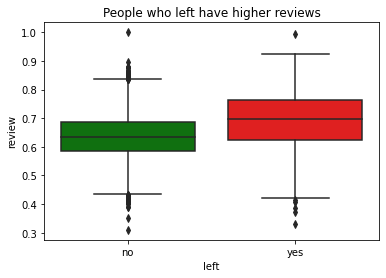

In [ ]:
# Number of left emplyees and their review: 
sns.boxplot(x="left", y="review", palette=p, data=df)
plt.title('People who left have higher reviews')
plt.show()

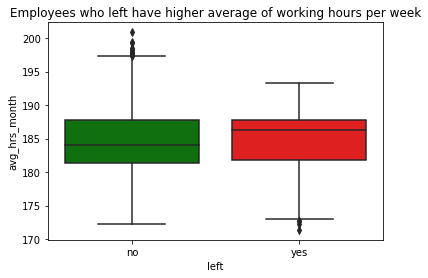

In [ ]:
# Number of left emplyees and their work hours: 
sns.boxplot(x="left", y="avg_hrs_month", palette=p, data=df)
plt.title('Employees who left have higher average of working hours per week')
plt.show()

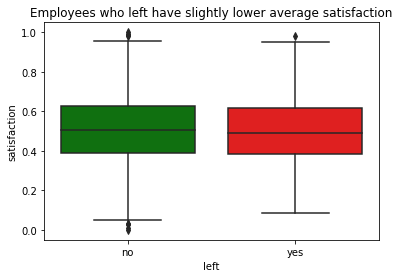

In [ ]:
# Number of left emplyees and their satisfaction: 
sns.boxplot(x="left", y="satisfaction", palette=p, data=df)
plt.title('Employees who left have slightly lower average satisfaction')
plt.show()

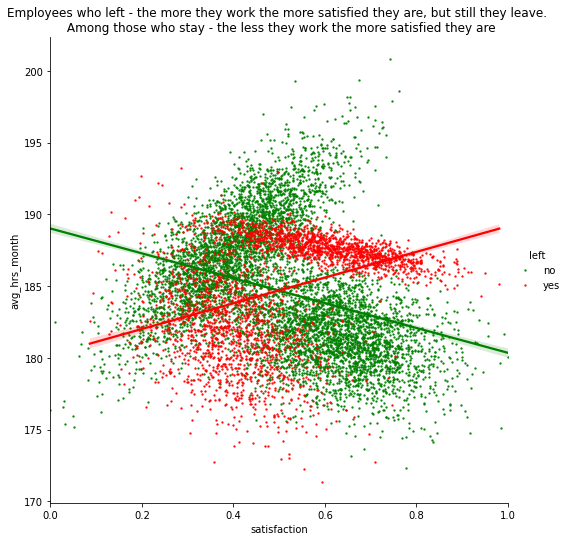

In [ ]:
# There is a fairly strong correlation between satisfaction and average hours or working per week
sns.lmplot(x="satisfaction", y="avg_hrs_month", hue="left", data=df,  height=7, scatter_kws={"s": 2}, palette=p)
plt.title('Employees who left - the more they work the more satisfied they are, but still they leave. \n Among those who stay - the less they work the more satisfied they are')
plt.show()

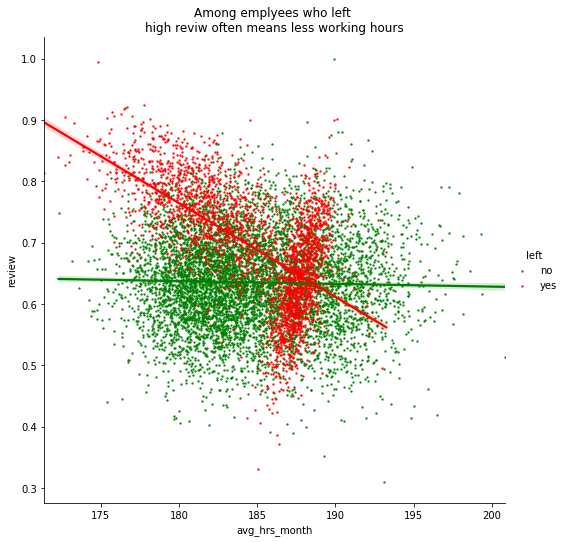

In [ ]:
sns.lmplot(x="avg_hrs_month", y="review", hue="left", data=df,  height=7, scatter_kws={"s": 2}, palette=p)
plt.title('Among emplyees who left \nhigh reviw often means less working hours')
plt.show()

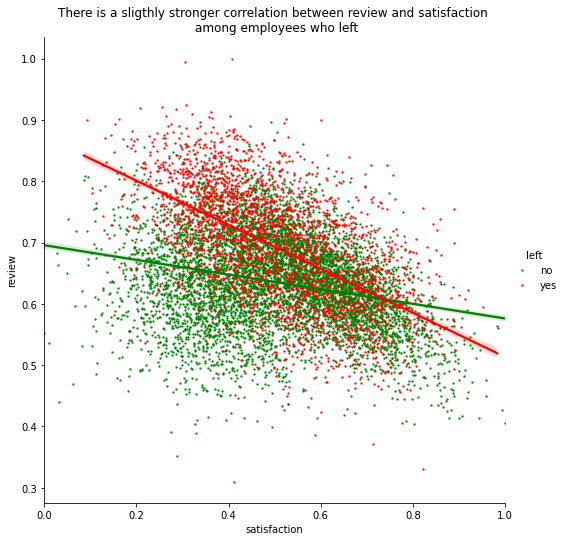

In [ ]:
sns.lmplot(x="satisfaction", y="review", hue="left", data=df,  height=7, scatter_kws={"s": 2}, palette=p)
plt.title('There is a sligthly stronger correlation between review and satisfaction \n among employees who left')
plt.show()

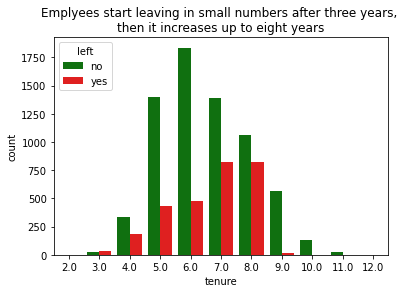

In [ ]:
# So, how many years have emplyees worked, before they leave?
sns.countplot(x='tenure', hue='left', data=df, palette=p)
plt.title('Emplyees start leaving in small numbers after three years, \nthen it increases up to eight years')
plt.show()